In [1]:
import math
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

$(1 + bp)x = (1 + bp^2)(1 + cp)y$, меняется $b$

### Передаточная функция:###
$W(p) = {1+bp\over(1+bp^2)(1+cp)}$

## Зависимость полюсов системы от параметра $b$##

For b==10.00
	P==(0.00, 0.32)
For b==39.81
	P==(0.00, 0.16)
For b==158.49
	P==(0.00, 0.08)
For b==630.96
	P==(-0.00, 0.04)
For b==2511.89
	P==(0.00, 0.02)
For b==10000.00
	P==(-0.00, 0.01)
For b==39810.72
	P==(0.00, 0.01)
For b==158489.32
	P==(0.00, 0.00)
For b==630957.34
	P==(-0.00, 0.00)
For b==2511886.43
	P==(0.00, 0.00)
For b==10000000.00
	P==(0.00, 0.00)


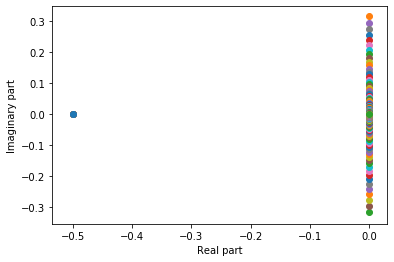

In [22]:
c = 2
p_num = 101
bs = np.logspace(1, 7, p_num)
Poles = []

for i in range(p_num):
    b = bs[i]
    den = [b, 1]
    num = [b*c, b, c, 1]
    z,p,k = signal.tf2zpk(den, num) # c = const, b changes
    Poles = np.concatenate((Poles, p))

fg,ax = plt.subplots()
plt.xlabel('Real part')
plt.ylabel('Imaginary part')

for row in Poles:
    plt.scatter(np.real(row), np.imag(row))

for i in range(0,p_num,10): 
    b = bs[i]
    p = Poles[i*3+1]
    print('For b=={0:.2f}'.format(b))
    print('\tP==({0:.2f}, {1:.2f})'.format(p.real, p.imag))

plt.show()

## Проверка устойчивости ##

In [66]:
def Raus(coefs):
    """
    Проверяет систему на устойчивость методом Рауса.
    """
    C = []
    firstRow = []
    secondRow = []
    n = len(coefs)
    # постановка первых двух строк
    for i in range(n):
        if(i % 2 == 0):
            firstRow.append(coefs[i])
        else:
            secondRow.append(coefs[i])
    
    C.append(firstRow)
    C.append(secondRow)
    # поставновка оставшихся
    for i in range(2,n//2+1):
        r = C[i-2][0]/C[i-1][0]
        row = []
        
        for j in range(0,n//2-i+1):
            row.append(C[i-2][j+1] - r*C[i-1][j+1])
        C.append(row)
    # проверка устойчивости
    first_column_weight = 0
    sus_weight = n//2+1
    
    for row in C:
        if row[0] == 0:
            return None
        
        first_column_weight+= abs(row[0])/row[0]
    
    if abs(first_column_weight) == sus_weight:
        return True
    
    return False


def getParam(sus=True, c=2, bs=np.logspace(1, 7, p_num), p_num=101):
    """
    Возвращает параметр b, при котором система устойчива/не устойчива.
    Если sus == False, ищется параметр для неустойивой системы,
    если sus == True, то устойчивой.
    """
    for i in range(p_num):
        b = bs[i]
        den = [b*c, b, c, 1]
        
        if( (Raus(den) != None) and(Raus(den) and sus) or (not Raus(den) and not sus) ):
            return b
            
    return None

In [69]:
p_num = 101
bs = np.logspace(1, 7, p_num)
c = 2
b_sus = getParam(c=c, bs=bs, p_num=p_num)

if(b_sus is None):
    print('There is no sustainable parameter b')
else:
    system = signal.lti([b_sus, 1], [b_sus*c, b_sus, c, 1]) 

    T= np.linspace(0,100,1e4 + 1)
    S = [ math.sin( t*2*math.pi/3 ) for t in T ]
    Tout, yout, xout = signal.lsim(system, S, T)

    plt.plot(Tout, yout)
    plt.show()

There is no sustainable parameter b


/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


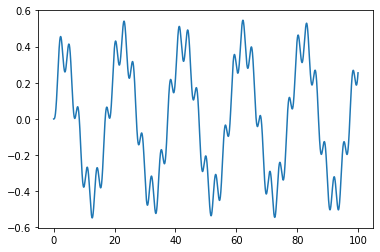

In [84]:
p_num = 101
bs = np.logspace(1, 7, p_num)
c = 2
b_unsus = getParam(sus=False, c=c, bs=bs, p_num=p_num)

if(b_unsus is False):
    print('There is no unsustainable parameter b')
else:
    system = signal.lti([b_unsus, 1], [b_unsus*c, b_unsus, c, 1]) 

    T= np.linspace(0,100,1e4 + 1)
    S = [ math.sin( t*2*math.pi/3 ) for t in T ]
    Tout, yout, xout = signal.lsim(system, S, T)

    plt.plot(Tout, yout)
    plt.show()

## АЧХ и ФЧХ##

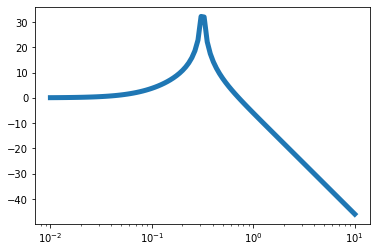

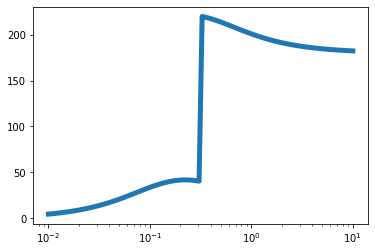

In [73]:
system = signal.lti([b_unsus, 1], [b_unsus*c, b_unsus, c, 1]) 
w, mag, phase = signal.bode(system)
plt.figure()
plt.semilogx(w, mag, label='python magnitude', linewidth=5)
plt.figure()
plt.semilogx(w, phase, label='python phase', linewidth=5)
plt.show()

## Система с обратной связью##

For b==10.00
	P==(-0.25, 0.66)
	P==(-0.25, -0.66)
	P==(-0.00, 0.00)
For b==39.81
	P==(-0.22, 0.67)
	P==(-0.22, -0.67)
	P==(-0.06, 0.00)
For b==158.49
	P==(-0.24, 0.66)
	P==(-0.24, -0.66)
	P==(-0.01, 0.00)
For b==630.96
	P==(-0.25, 0.66)
	P==(-0.25, -0.66)
	P==(-0.00, 0.00)
For b==2511.89
	P==(-0.25, 0.66)
	P==(-0.25, -0.66)
	P==(-0.00, 0.00)
For b==10000.00
	P==(-0.25, 0.66)
	P==(-0.25, -0.66)
	P==(-0.00, 0.00)
For b==39810.72
	P==(-0.25, 0.66)
	P==(-0.25, -0.66)
	P==(-0.00, 0.00)
For b==158489.32
	P==(-0.25, 0.66)
	P==(-0.25, -0.66)
	P==(-0.00, 0.00)
For b==630957.34
	P==(-0.25, 0.66)
	P==(-0.25, -0.66)
	P==(-0.00, 0.00)
For b==2511886.43
	P==(-0.25, 0.66)
	P==(-0.25, -0.66)
	P==(-0.00, 0.00)
For b==10000000.00
	P==(-0.25, 0.66)
	P==(-0.25, -0.66)
	P==(-0.00, 0.00)


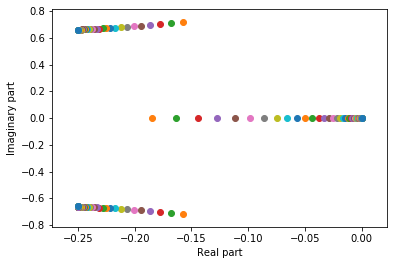

In [82]:
# W = Wd /(1 + WdWr)
c = 2
p_num = 101
vs = np.logspace(1, 7, p_num)
Ps = []

for i in range(p_num):
    num = [b*c, b, c,   1]
    den = [b*c, b, b+c, 2]
    b = vs[i]
    z,p,k = signal.tf2zpk(num, den) # c = const, b changes
    Ps.append(p)

fg,ax = plt.subplots()
plt.xlabel('Real part')
plt.ylabel('Imaginary part')

for row in Ps:
    plt.scatter(np.real(row), np.imag(row))

for i in range(0,p_num,10): 
    b = vs[i]
    print('For b=={0:.2f}'.format(b))
    for row in Ps[i]:
        print('\tP==({0:.2f}, {1:.2f})'.format(row.real, row.imag))

plt.show()

In [85]:
def getParam2(sus=True, c=2, bs=np.logspace(1, 7, p_num), p_num=101):
    """
    Возвращает параметр b, при котором система устойчива/не устойчива.
    Если sus == False, ищется параметр для неустойивой системы,
    если sus == True, то устойчивой.
    """
    for i in range(p_num):
        b = bs[i]
        den = [b*c, b, b+c, 2]
        
        if( (Raus(den) != None) and(Raus(den) and sus) or (not Raus(den) and not sus) ):
            return b
            
    return None

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


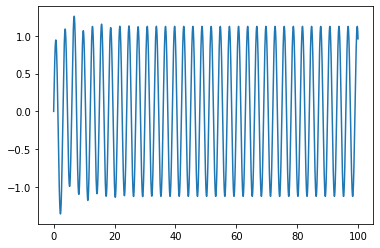

In [88]:
p_num = 101
bs = np.logspace(1, 7, p_num)
c = 2
b_sus = getParam2(c=c, bs=bs, p_num=p_num)

if(b_sus is None):
    print('There is no sustainable parameter b')
else:
    system = signal.lti([b_sus*c, b_sus, c, 1], [b_sus*c, b_sus, b_sus+c, 2]) 

    T= np.linspace(0,100,1e4 + 1)
    S = [ math.sin( t*2*math.pi/3 ) for t in T ]
    Tout, yout, xout = signal.lsim(system, S, T)

    plt.plot(Tout, yout)
    plt.show()

In [89]:
p_num = 101
bs = np.logspace(1, 7, p_num)
c = 2
b_unsus = getParam2(sus=False, c=c, bs=bs, p_num=p_num)

if(b_unsus is None):
    print('There is no unsustainable parameter b')
else:
    system = signal.lti([b_unsus*c, b_unsus, c, 1], [b_unsus*c, b_unsus, b_unsus+c, 2]) 

    T= np.linspace(0,100,1e4 + 1)
    S = [ math.sin( t*2*math.pi/3 ) for t in T ]
    Tout, yout, xout = signal.lsim(system, S, T)

    plt.plot(Tout, yout)
    plt.show()

There is no unsustainable parameter b


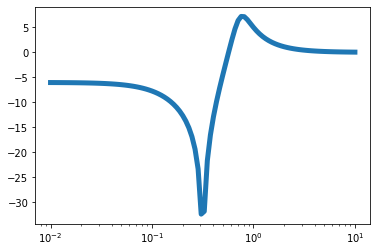

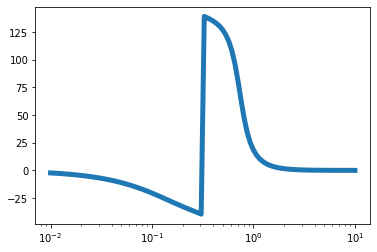

In [90]:
system = signal.lti([b_sus*c, b_sus, c, 1], [b_sus*c, b_sus, b_sus+c, 2]) 
w, mag, phase = signal.bode(system)
plt.figure()
plt.semilogx(w, mag, label='python magnitude', linewidth=5)
plt.figure()
plt.semilogx(w, phase, label='python phase', linewidth=5)
plt.show()